# **Final Project 1 (Uber vs Lyft)**

Group 7 :
1. Ainal Fajri Malahayati (PYTN-KS12-006)
2. Raihan Daffa Azis (PYTN-KS12-025)
3. Tsaabitah Anggraini (PYTN-KS12-023)

## **About Dataset** 



Dataset ini merupakan dataset yang berisikan tentang harga yang diperoleh dari 2 perusahaan besar jaringan transportasi, yaitu Uber dan Lyft. Dataset ini terdiri dari 57 kolom dan 693071 baris. Berkaitan dengan missing values, dataset ini memiliki sedikit missing values sehingga dataset ini sangat bagus untuk digunakan Linear Regression untuk dilakukan suatu prediksi pada atribut prediktor yaitu price.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

%matplotlib inline

## **Data Loading**

In [2]:
data = pd.read_csv('dataset/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
data.shape

(693071, 57)

Dataset ini terdiri dari 693071 baris dan 57 kolom.

## **Data Cleaning**

In [5]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
data['price'].isnull().sum()

55095

In [7]:
data = data.dropna()

In [8]:
data['price'].isnull().sum()

0

Setelah dilakukan pengecekan, terdapat nilai null pada kolom price, yaitu sebanyak 55095. Untuk menanganinya nilai null ini akan didrop secara keseluruhan. Hal ini dikarenakan persen nilai null sangat sedikit, yaitu kurang dari 10% dan tidak akan mengubah representasi bentuk dari dataset. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

## **Explore Data**

### **Data query and Grouping**

In [10]:
# 1. Tampilkan data perjalanan pada taksi Lyft yang menuju North Station
data[(data['cab_type'] == 'Lyft') & (data['destination'] == 'North Station')]


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692666,66927518-f9ba-4b13-af89-7ad3f96bcf5f,1.543790e+09,22,2,12,2018-12-02 22:28:05,America/New_York,South Station,North Station,Lyft,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
692667,6768c671-6ba2-44db-b31e-5e052305b4c9,1.543790e+09,22,2,12,2018-12-02 22:28:05,America/New_York,South Station,North Station,Lyft,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
692668,a8d46307-78f2-4efe-9753-b39e97dbb294,1.543790e+09,22,2,12,2018-12-02 22:28:05,America/New_York,South Station,North Station,Lyft,...,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
692669,b8120eda-3179-41c4-af10-c9aeea013da7,1.543327e+09,13,27,11,2018-11-27 13:48:24,America/New_York,South Station,North Station,Lyft,...,0.1429,1543338000,36.37,1543377600,47.06,1543320000,32.40,1543377600,44.15,1543320000


In [11]:
# 2. Tampilkan data perjalanan pada taksi Uber yang menuju North Station
data[(data['cab_type'] == 'Uber') & (data['destination'] == 'North Station')]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
76,0617e9b6-45f9-4f45-aa2b-5d06da008088,1.543784e+09,20,2,12,2018-12-02 20:58:00,America/New_York,Boston University,North Station,Uber,...,0.0956,1543770000,36.10,1543726800,50.37,1543784400,35.88,1543748400,49.70,1543784400
77,37b99b0e-d2a9-4aa6-b145-54de1c8793eb,1.544879e+09,13,15,12,2018-12-15 13:05:04,America/New_York,Boston University,North Station,Uber,...,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800
78,433900c1-12d0-4771-85ea-1e1f1a4a6d63,1.543479e+09,8,29,11,2018-11-29 08:08:05,America/New_York,Boston University,North Station,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
79,76ec209b-45a1-47e7-9eda-bc3a22402b8e,1.543361e+09,23,27,11,2018-11-27 23:21:23,America/New_York,Boston University,North Station,Uber,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
80,a841f68a-a00f-456a-a3f2-2a4f2f2917d6,1.545003e+09,23,16,12,2018-12-16 23:25:12,America/New_York,Boston University,North Station,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692997,463c1889-6aec-4e7a-81a2-8def92b77f2a,1.543479e+09,8,29,11,2018-11-29 08:18:01,America/New_York,Fenway,North Station,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
692998,6729248b-ea8e-474c-acbc-115cd18cc8ad,1.543479e+09,8,29,11,2018-11-29 08:18:01,America/New_York,Fenway,North Station,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
692999,6a1e463c-8aa2-463f-a04f-ceec724f0b33,1.543479e+09,8,29,11,2018-11-29 08:18:01,America/New_York,Fenway,North Station,Uber,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
693000,6c4280e8-972c-47e4-b32c-2eaa1792fcd7,1.543555e+09,5,30,11,2018-11-30 05:23:02,America/New_York,Fenway,North Station,Uber,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600


In [12]:
# 3. Tampilkan data perjalanan yang menggunakan Uber Taxi
data[(data['cab_type'] == 'Uber') & (data['name'] == 'Taxi')]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [13]:
# Data grouping

# 1. Tipe taksi apa saja yang terdapat pada Uber dan juga Lyft dan total jarak yang ditempuh oleh masing-masing tipe taksi
# Langkah-langkah
# a. Mencari nilai unique dari merk taksi
cab_type = data['cab_type'].unique()
print(cab_type)
# b. Mencari nilai unique dari tipe taksi
name = data['name'].unique()
print(name)
print('\n')
# c. Grouping dengan atribut distance
group1 = data.groupby(['cab_type','name'])['distance'].sum()
print(group1)
print('\n')

['Lyft' 'Uber']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']


cab_type  name        
Lyft      Lux             112049.32
          Lux Black       112049.32
          Lux Black XL    112049.32
          Lyft            112049.32
          Lyft XL         112049.32
          Shared          112047.19
Uber      Black           120735.12
          Black SUV       120736.15
          UberPool        120726.22
          UberX           120732.46
          UberXL          120736.15
          WAV             120736.15
Name: distance, dtype: float64




Berdasarkan data grouping diatas, dapat dilihat bahwa tipe kendaraan pada Uber lebih banyak melakukan perjalanan yang jauh dibandingkan dengan tipe kendaraan pada Lyft.

In [14]:
# 2. Tampilkan tipe taksi yang ada pada kedua Uber dan Lyft beserta harganya
# Grouping atribut cab_type, name dengan atribut price
group2 = data.groupby(['cab_type','name'])['price'].sum()
print(group2)

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Uber      Black           1130758.00
          Black SUV       1668679.50
          UberPool         482184.00
          UberX            537997.00
          UberXL           863803.00
          WAV              538013.50
Name: price, dtype: float64


Sedangkan dari segi harga, harga termurah diperoleh cab_type Lyft dengan name Shared dengan total harga 308929.50

In [15]:
# 3. Tampilkan total price dari Uber dan Lyft
data.groupby(['cab_type'])['price'].sum()

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

Jika dibandingkan secara keseluruhan, harga yang diperoleh Uber jauh lebih murah dibandingkan Lyft. Hal ini memungkinkan banyak masyarakat di eropa sana memilih Uber sebagai alat trasportasi mereka.

### **Central tendency**

In [16]:
# 1. Mencari mean
# Menemukan waktu rata-rata dari data perjalanan
mean = data['distance'].mean()
print(mean)

# 2. Mencari mode
# Menemukan modus dari temprature pada data perjalanan
mode = data['temperature'].mode()
print(mode)

# 3. Mencari median
median = statistics.median(data['price'])
print(median)

2.189261100731062
0    37.92
Name: temperature, dtype: float64
13.5


Untuk proses Central tendency, dihitung nilai mean untuk kolom distance, dan didapatkan hasil rata-rata jarak yang ditempuh sebesar 2.18. Lalu untuk modus, dihitung modus dari data kolom temprature yaitu sebesar 37.92. Sedangkan median untuk price sebesar 13.5.


### **Variability**

In [17]:
# 1. Variance
var = np.var(data['price'], ddof=1)
print("Variance of price: ", var)
# 2. Standard Deviation
std = np.std(data['price'], ddof=1)
print("Standard Deviation of price: ", std)
# 3. Skewness
z = data['price']
z.skew()
print("Skewness: ", z.skew())
# 4. Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)
# 5. Ranges
range = np.ptp(z)
print("Range: ", range)

Variance of price:  86.94366295474465
Standard Deviation of price:  9.324358581411627
Skewness:  1.0457470560899258
Percentile:  [ 9.  13.5 22.5]
Range:  95.0


## **Data Visualization**

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693065      Night
693066      Night
693067      Night
693069      Night
693070      Night
Name: hour, Length: 637976, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

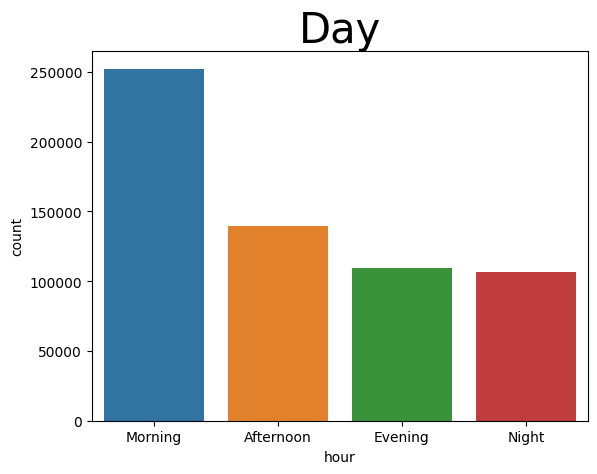

In [18]:
#Number of rides during the parts of the day
day=pd.cut(x=data['hour'],bins=[0,10,15,19,23],labels = ['Morning','Afternoon','Evening','Night'])
plt.title('Day',fontsize=30)
sns.countplot(x=day)
day

Berdasarkan hasil visualisasi diatas, banyak taxi yang lebih sering beroperasi di pagi hari. Hal ini ditunjukkan dengan bar yang paling tinggi untuk morning dengan nilai 250000. 

7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 147, dtype: int64

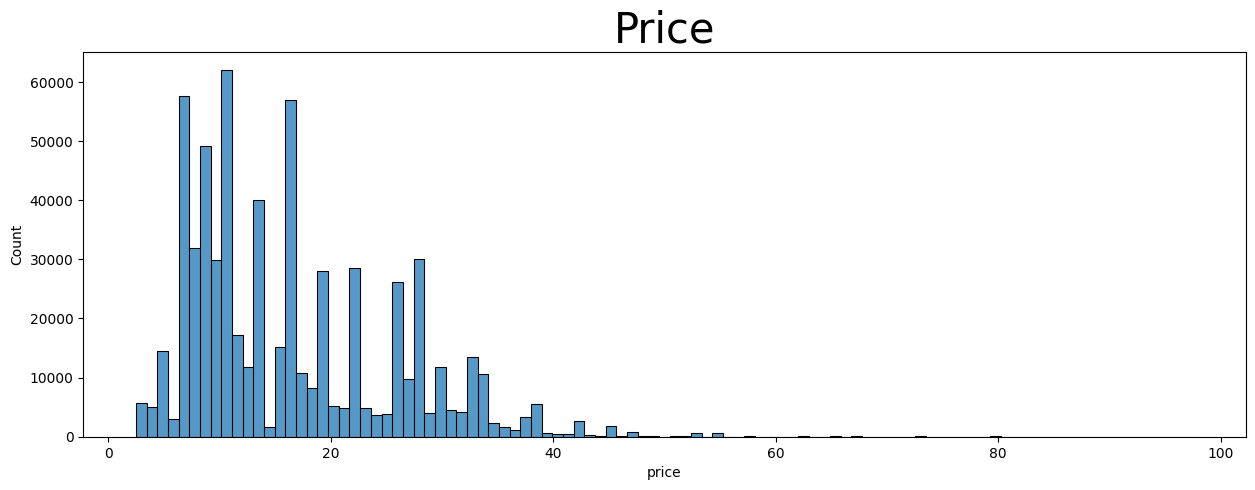

In [19]:
#show distribution of price
bins = np.linspace(data['price'].min(),data['price'].max(),100)
count=data['price'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Price',fontsize=30)
sns.histplot(x='price',data=data,bins=bins)
count

Berdasarkan visualisasi diatas, distribusi dari atribut price condong ka arah kanan. Artinya, masyarakat disana lebih tertarik melakukan perjalanan dengan taxi jika harganya sedang murah.

([<matplotlib.patches.Wedge at 0x26fba206190>,
 [Text(0.6018112140505569, 0.9207731874044742, ' cloudy '),
  Text(-0.994595128330795, 0.4698728878118525, ' partly-cloudy-night '),
  Text(-0.7673724848010052, -0.788124019155825, ' partly-cloudy-day '),
  Text(0.24557720635597322, -1.0722368375123081, ' rain '),
  Text(0.9088634135524151, -0.6196509465060568, ' clear-night '),
  Text(1.077370219583778, -0.22197614726362486, ' clear-day '),
  Text(1.0990831239157568, -0.04490308144862181, ' fog ')],
 [Text(0.32826066220939465, 0.5022399204024404, '31.573%'),
  Text(-0.542506433634979, 0.25629430244282864, '22.805%'),
  Text(-0.41856680989145734, -0.42988582863044994, '16.668%'),
  Text(0.13395120346689446, -0.5848564568248953, '15.074%'),
  Text(0.4957436801194991, -0.33799142536694, '8.711%'),
  Text(0.5876564834093333, -0.12107789850743172, '3.868%'),
  Text(0.5994998857722309, -0.02449258988106644, '1.300%')])

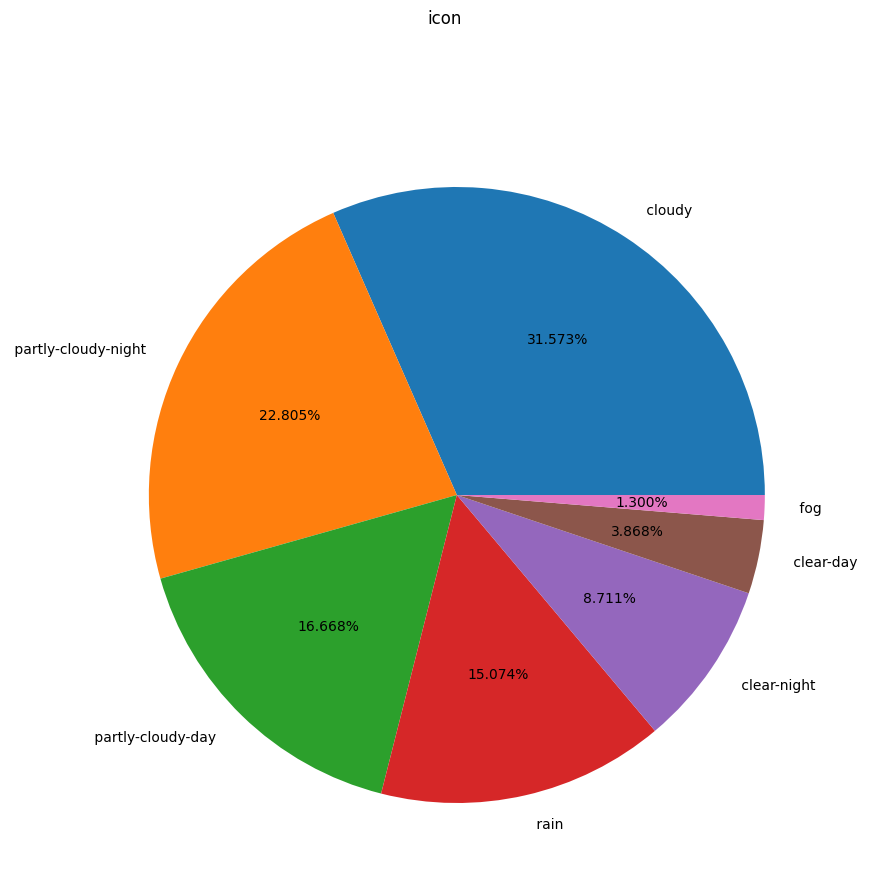

In [20]:
#show number of icon 
plt.figure(figsize=(10,10))
plt.suptitle('icon')
plt.pie(data['icon'].value_counts(),labels=list(data['icon'].value_counts().index),autopct ='%1.3f%%')

Sedangkan jika dilihat dari segi cuaca, banyak perjalanan yang dilakukan pada saat cuaca sedang berawan. Hal ini dibuktikan dengan besarnya bagian piechart untuk cloudy yaitu sebesar 31.573%. Sedangkan perjalanan sedikit dilakukan pada saat cuaca sedang kabut(fog) yaitu sebesar 1.3%.

([<matplotlib.patches.Wedge at 0x26fe5a80910>,
 [Text(0.6018112140505569, 0.9207731874044742, ' Overcast '),
  Text(-0.9679827366161721, 0.5225030350276126, ' Mostly Cloudy '),
  Text(-0.8085092001828758, -0.7458638436200314, ' Partly Cloudy '),
  Text(0.1608831273537352, -1.0881712270285786, ' Clear '),
  Text(0.7818592781941908, -0.7737545276776473, ' Light Rain '),
  Text(1.0024539027631545, -0.45286440888517665, ' Rain '),
  Text(1.0704086519843887, -0.25342714487000795, ' Possible Drizzle '),
  Text(1.0937014947240844, -0.11754590779054734, ' Foggy '),
  Text(1.0993968886073868, -0.036420891263085245, ' Drizzle ')],
 [Text(0.32826066220939465, 0.5022399204024404, '31.573%'),
  Text(-0.527990583608821, 0.2850016554696068, '21.098%'),
  Text(-0.4410050182815685, -0.4068348237927444, '18.375%'),
  Text(0.08775443310203737, -0.5935479420155882, '12.580%'),
  Text(0.4264686971968313, -0.4220479241878076, '7.914%'),
  Text(0.5467930378708115, -0.24701695030100543, '3.414%'),
  Text(0.58

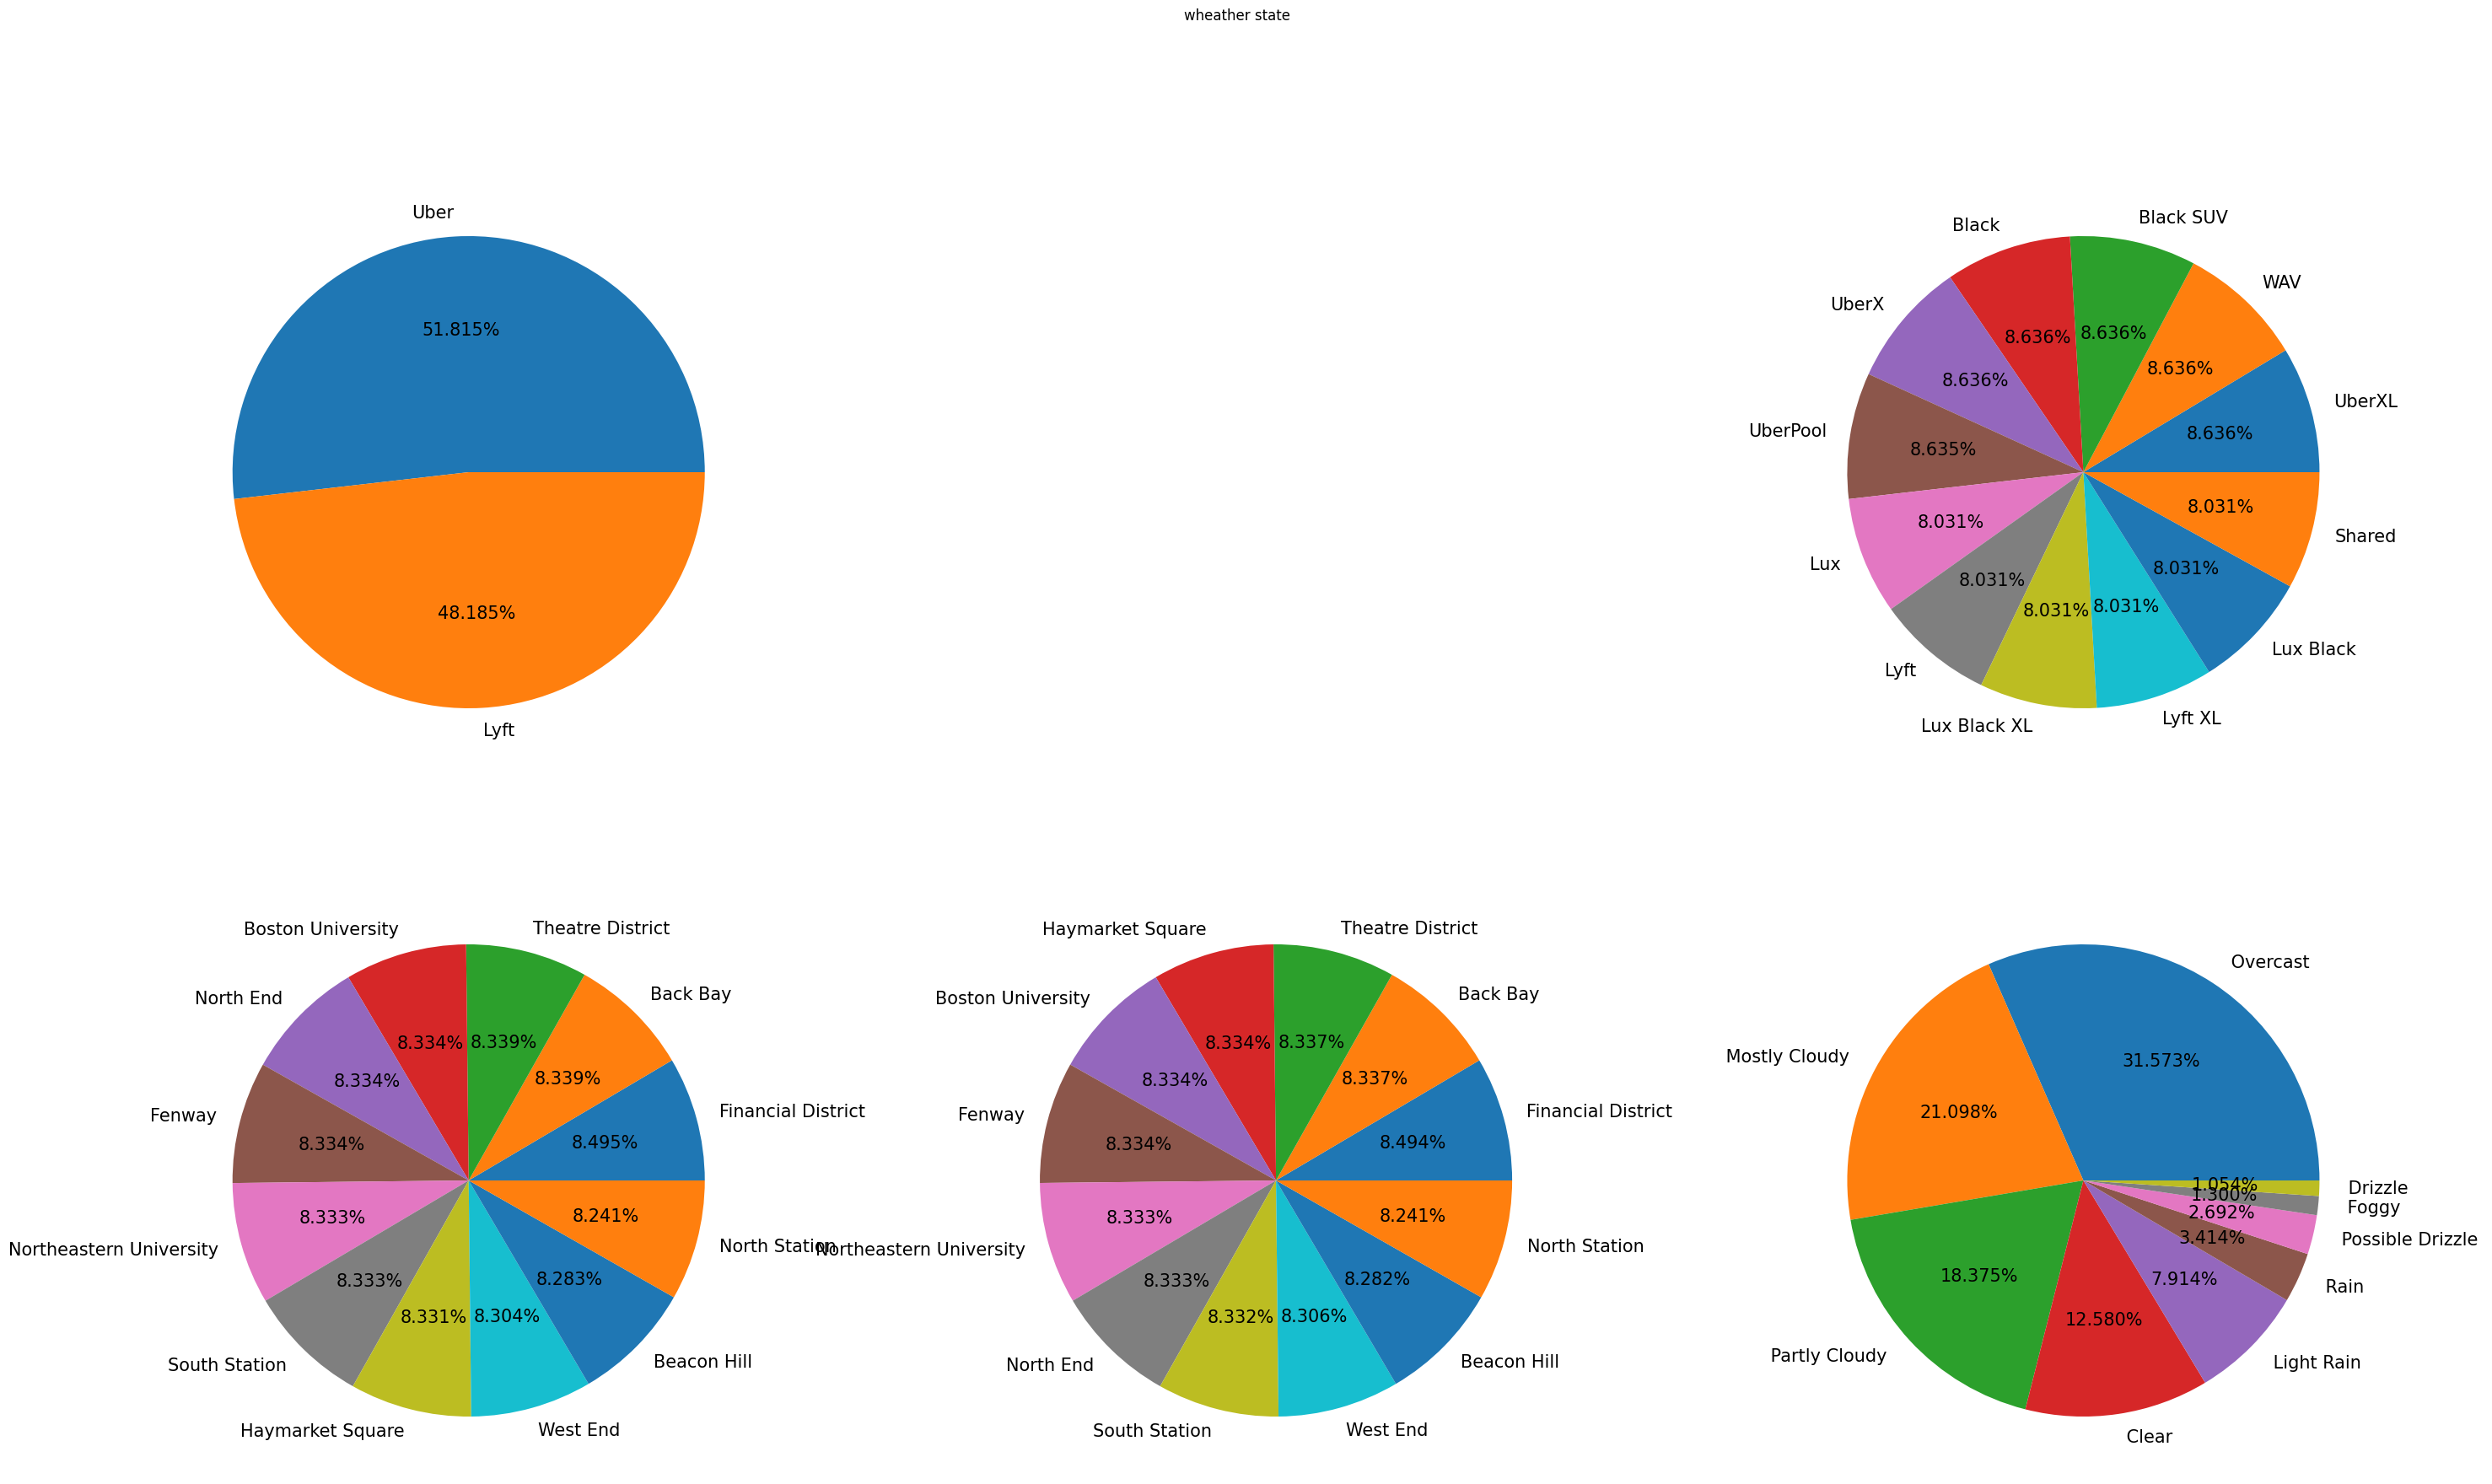

In [21]:
plt.figure(figsize=(35,20))
textprops = {"fontsize":15}
plt.subplot(2,3,1)

#show number of cab_type
plt.suptitle('Number Of cab_type')
plt.pie(data['cab_type'].value_counts(),labels=list(data['cab_type'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,3)
#show number of name
plt.suptitle('Number Of cab_type')
plt.pie(data['name'].value_counts(),labels=list(data['name'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,4)
#show number of source
plt.suptitle('Number Of Source')
plt.pie(data['source'].value_counts(),labels=list(data['source'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,5)
#show number of destination
plt.suptitle('Number Of destination')
plt.pie(data['destination'].value_counts(),labels=list(data['destination'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,6)
#show number of wheather state 
plt.suptitle('wheather state ')
plt.pie(data['short_summary'].value_counts(),labels=list(data['short_summary'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)

Berdasarkan visualisasi diatas, banyak masyarakat yang memilih Uber sebagai pilihan transportasi mereka, hal ini disebabkan oleh harga Uber yang lebih murah dibandingkan Lyft. Sedangkan untuk tipe kendaraan yang sering digunakan masyarakat ialah tipe kendaraan yang merupakan produk dari Uber seperti UberPool, UberX, Black, BlackSUV, WAV, dan UberXL. Sedangkan untuk destinasi dan source, diperoleh hasil yang sama yaitu banyak masyarakat yang melakukan perjalanan menuju ke Financial District atau dari Financial District, hal ini ditunjukkan dengan dihasilkan persen yang sama, yaitu sebesar 8.49%. Lalu dari segi short_summary, banyak masyarakat yang melakukan perjalanan pada saat Overcast, yaitu sebesar 31.573%.

## **Data Preprocessing**

In [22]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [24]:
data['route'] = data['source'] + " to " + data['destination']
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Haymarket Square to North Station


In [25]:
data.drop(['source', 'destination'],axis=1,inplace=True)
data

,id,timestamp,hour,day,month,datetime,timezone,cab_type,product_id,name,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Lyft,lyft_line,Shared,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Lyft,lyft_premier,Lux,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Lyft,lyft,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Lyft,lyft_plus,Lyft XL,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,West End to North End


Sebelumnya kita akan menambahkan 1 kolom baru yaitu route, yang merupakan gabungan dari source dan destination. Kemudian dihapus kolom source dan destination. Dengan adanya kolom route ini, maka kita dapat melihat secara sekaligus source dan destination dalam 1 kolom saja sehingga representasi dataset terlihat lebih efektif. Setelah itu, dilakukan proses feature selection, disini kita akan mencoba untuk membuat corr map untuk melihat korelasi antar setiap atribut dengan atribut prediktor yaitu price. 

,surge_multiplier,distance,price
surge_multiplier,1.000000,0.025946,0.240458
distance,0.025946,1.000000,0.345061
price,0.240458,0.345061,1.000000


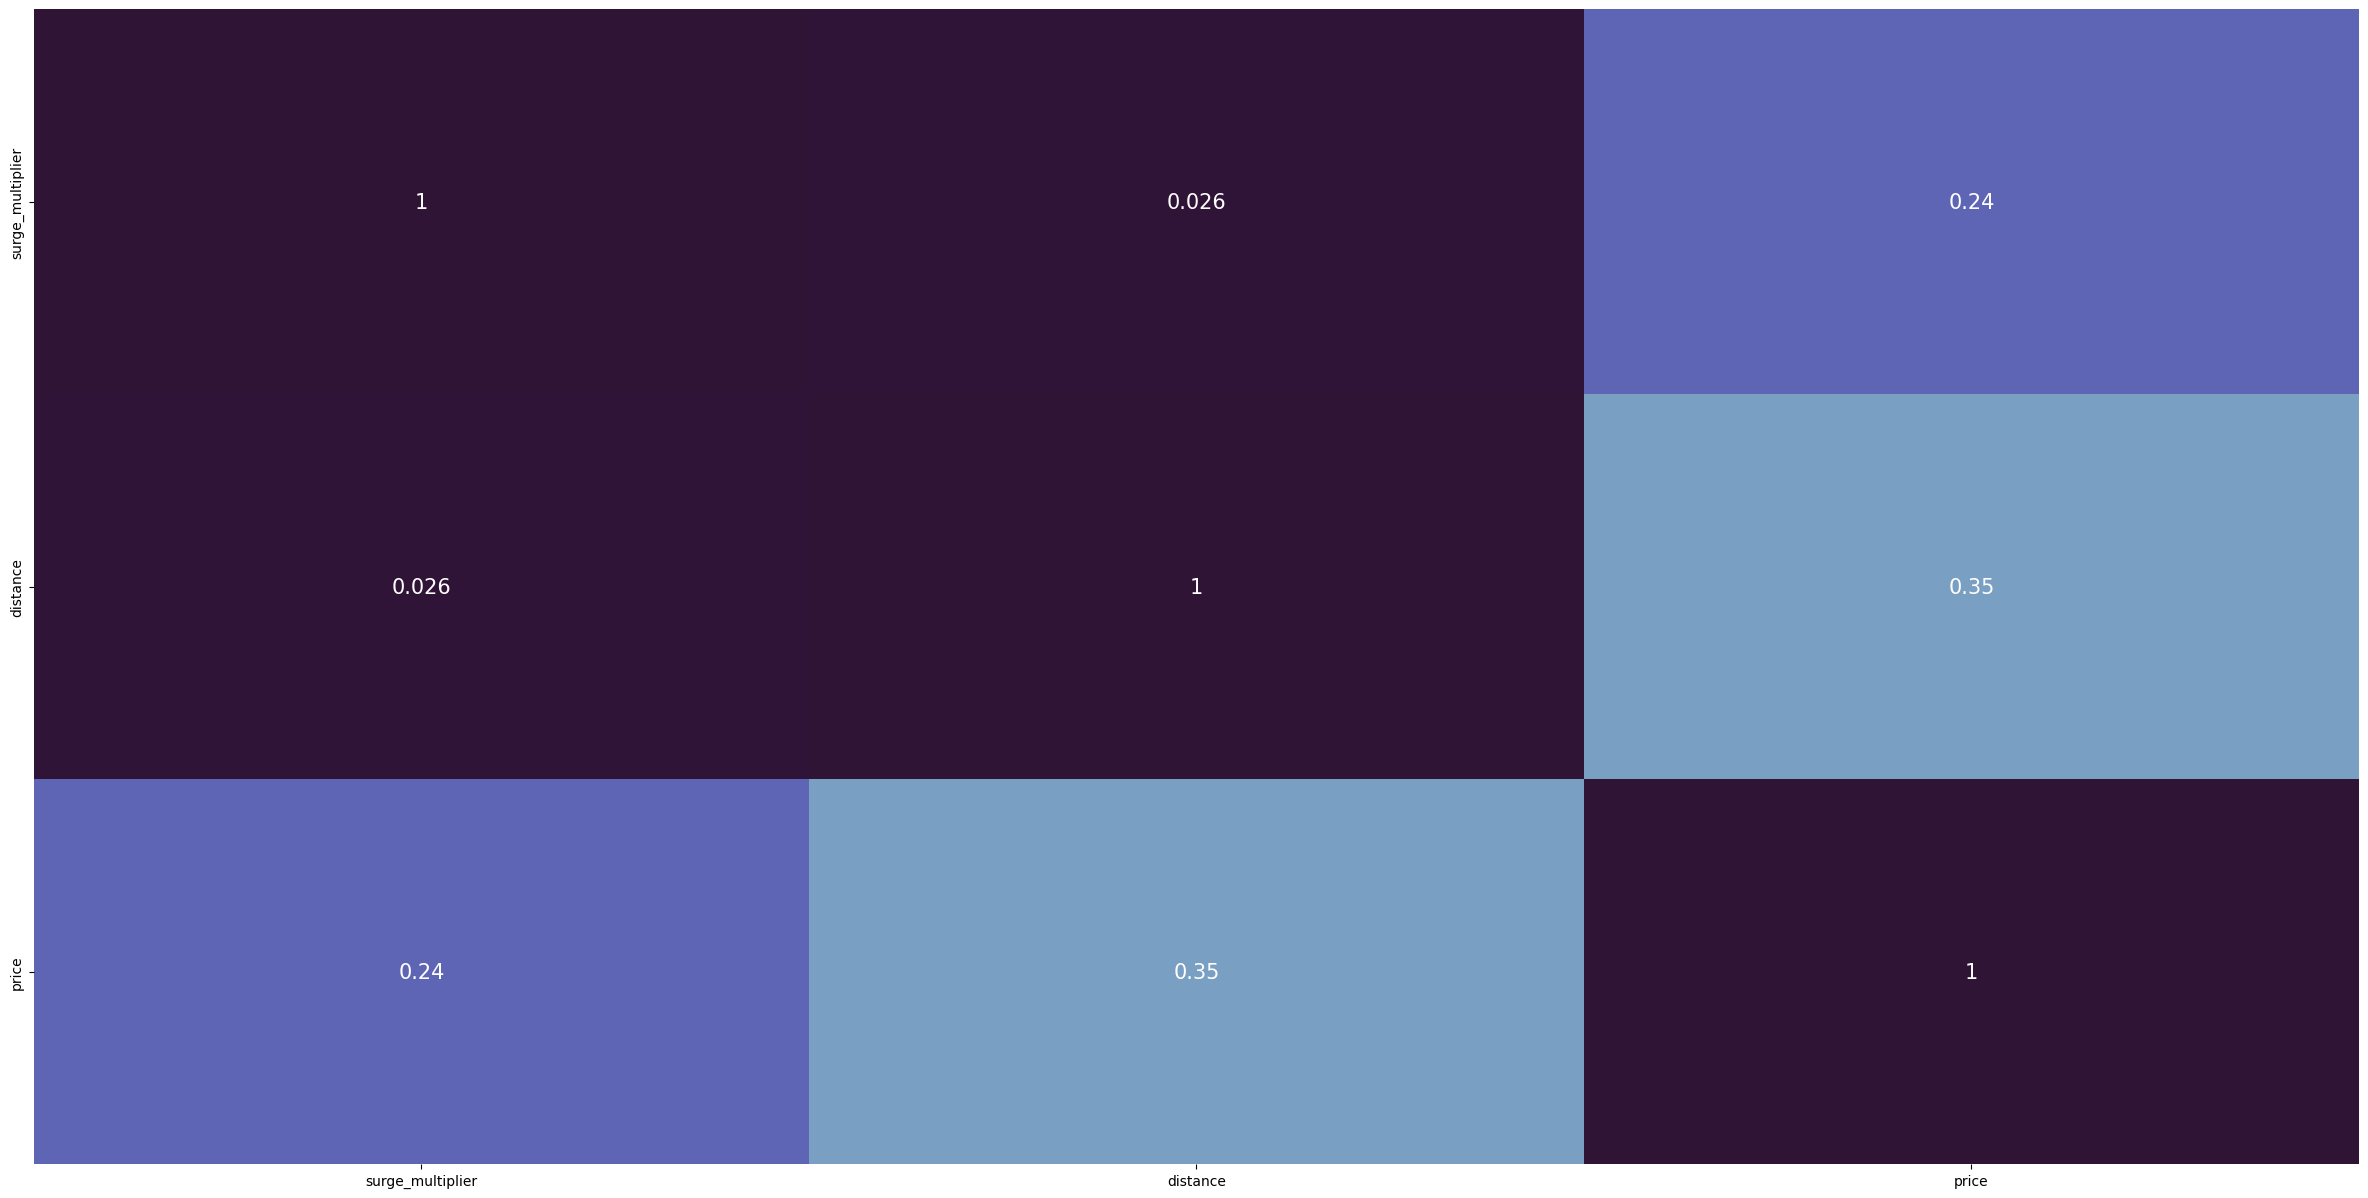

In [26]:
temp=['surge_multiplier','distance','price']
plt.figure(figsize=(30,15))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

C:\Users\tsaab\AppData\Local\Temp\ipykernel_10828\1040695893.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_corr=data[temp].corr()


,timestamp,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
timestamp,1.000000,-0.249027,-0.226472,-0.228324,-0.366885,-0.215550,-0.402043,-0.307194,0.999332,-0.186495,-0.378538,-0.157891,0.999364,0.998195,0.999290,0.998288,0.999276,0.000808
temperature,-0.249027,1.000000,0.946157,0.788564,0.502193,0.710386,0.382828,0.789220,-0.257457,0.780426,0.817443,0.703078,-0.254755,-0.242993,-0.254172,-0.231811,-0.255578,-0.000084
apparentTemperature,-0.226472,0.946157,1.000000,0.821492,0.573985,0.811624,0.495844,0.697343,-0.233333,0.792476,0.786478,0.782255,-0.231526,-0.224970,-0.227930,-0.212681,-0.228891,-0.000193
temperatureHigh,-0.228324,0.788564,0.821492,1.000000,0.611616,0.958722,0.534808,0.794579,-0.231465,0.985996,0.877508,0.951037,-0.228424,-0.214435,-0.226153,-0.205927,-0.227134,-0.000516
temperatureLow,-0.366885,0.502193,0.573985,0.611616,1.000000,0.629284,0.933931,0.473054,-0.366003,0.567522,0.636257,0.579368,-0.369039,-0.383572,-0.360347,-0.367621,-0.362016,0.000182
apparentTemperatureHigh,-0.215550,0.710386,0.811624,0.958722,0.629284,1.000000,0.602182,0.665030,-0.218425,0.926408,0.791979,0.974276,-0.215812,-0.206880,-0.211708,-0.197785,-0.212270,-0.000261
apparentTemperatureLow,-0.402043,0.382828,0.495844,0.534808,0.933931,0.602182,1.000000,0.284247,-0.400401,0.492195,0.479351,0.558125,-0.403237,-0.416470,-0.395025,-0.404343,-0.396456,0.000831
temperatureMin,-0.307194,0.789220,0.697343,0.794579,0.473054,0.665030,0.284247,1.000000,-0.309989,0.782981,0.953828,0.648346,-0.307319,-0.294846,-0.306820,-0.278686,-0.308906,-0.000428
temperatureHighTime,0.999332,-0.257457,-0.233333,-0.231465,-0.366003,-0.218425,-0.400401,-0.309989,1.000000,-0.188985,-0.381595,-0.159892,0.999909,0.998486,0.999885,0.998537,0.999885,0.000759
temperatureMax,-0.186495,0.780426,0.792476,0.985996,0.567522,0.926408,0.492195,0.782981,-0.188985,1.000000,0.838385,0.956333,-0.185573,-0.168262,-0.185704,-0.162329,-0.186854,-0.000550


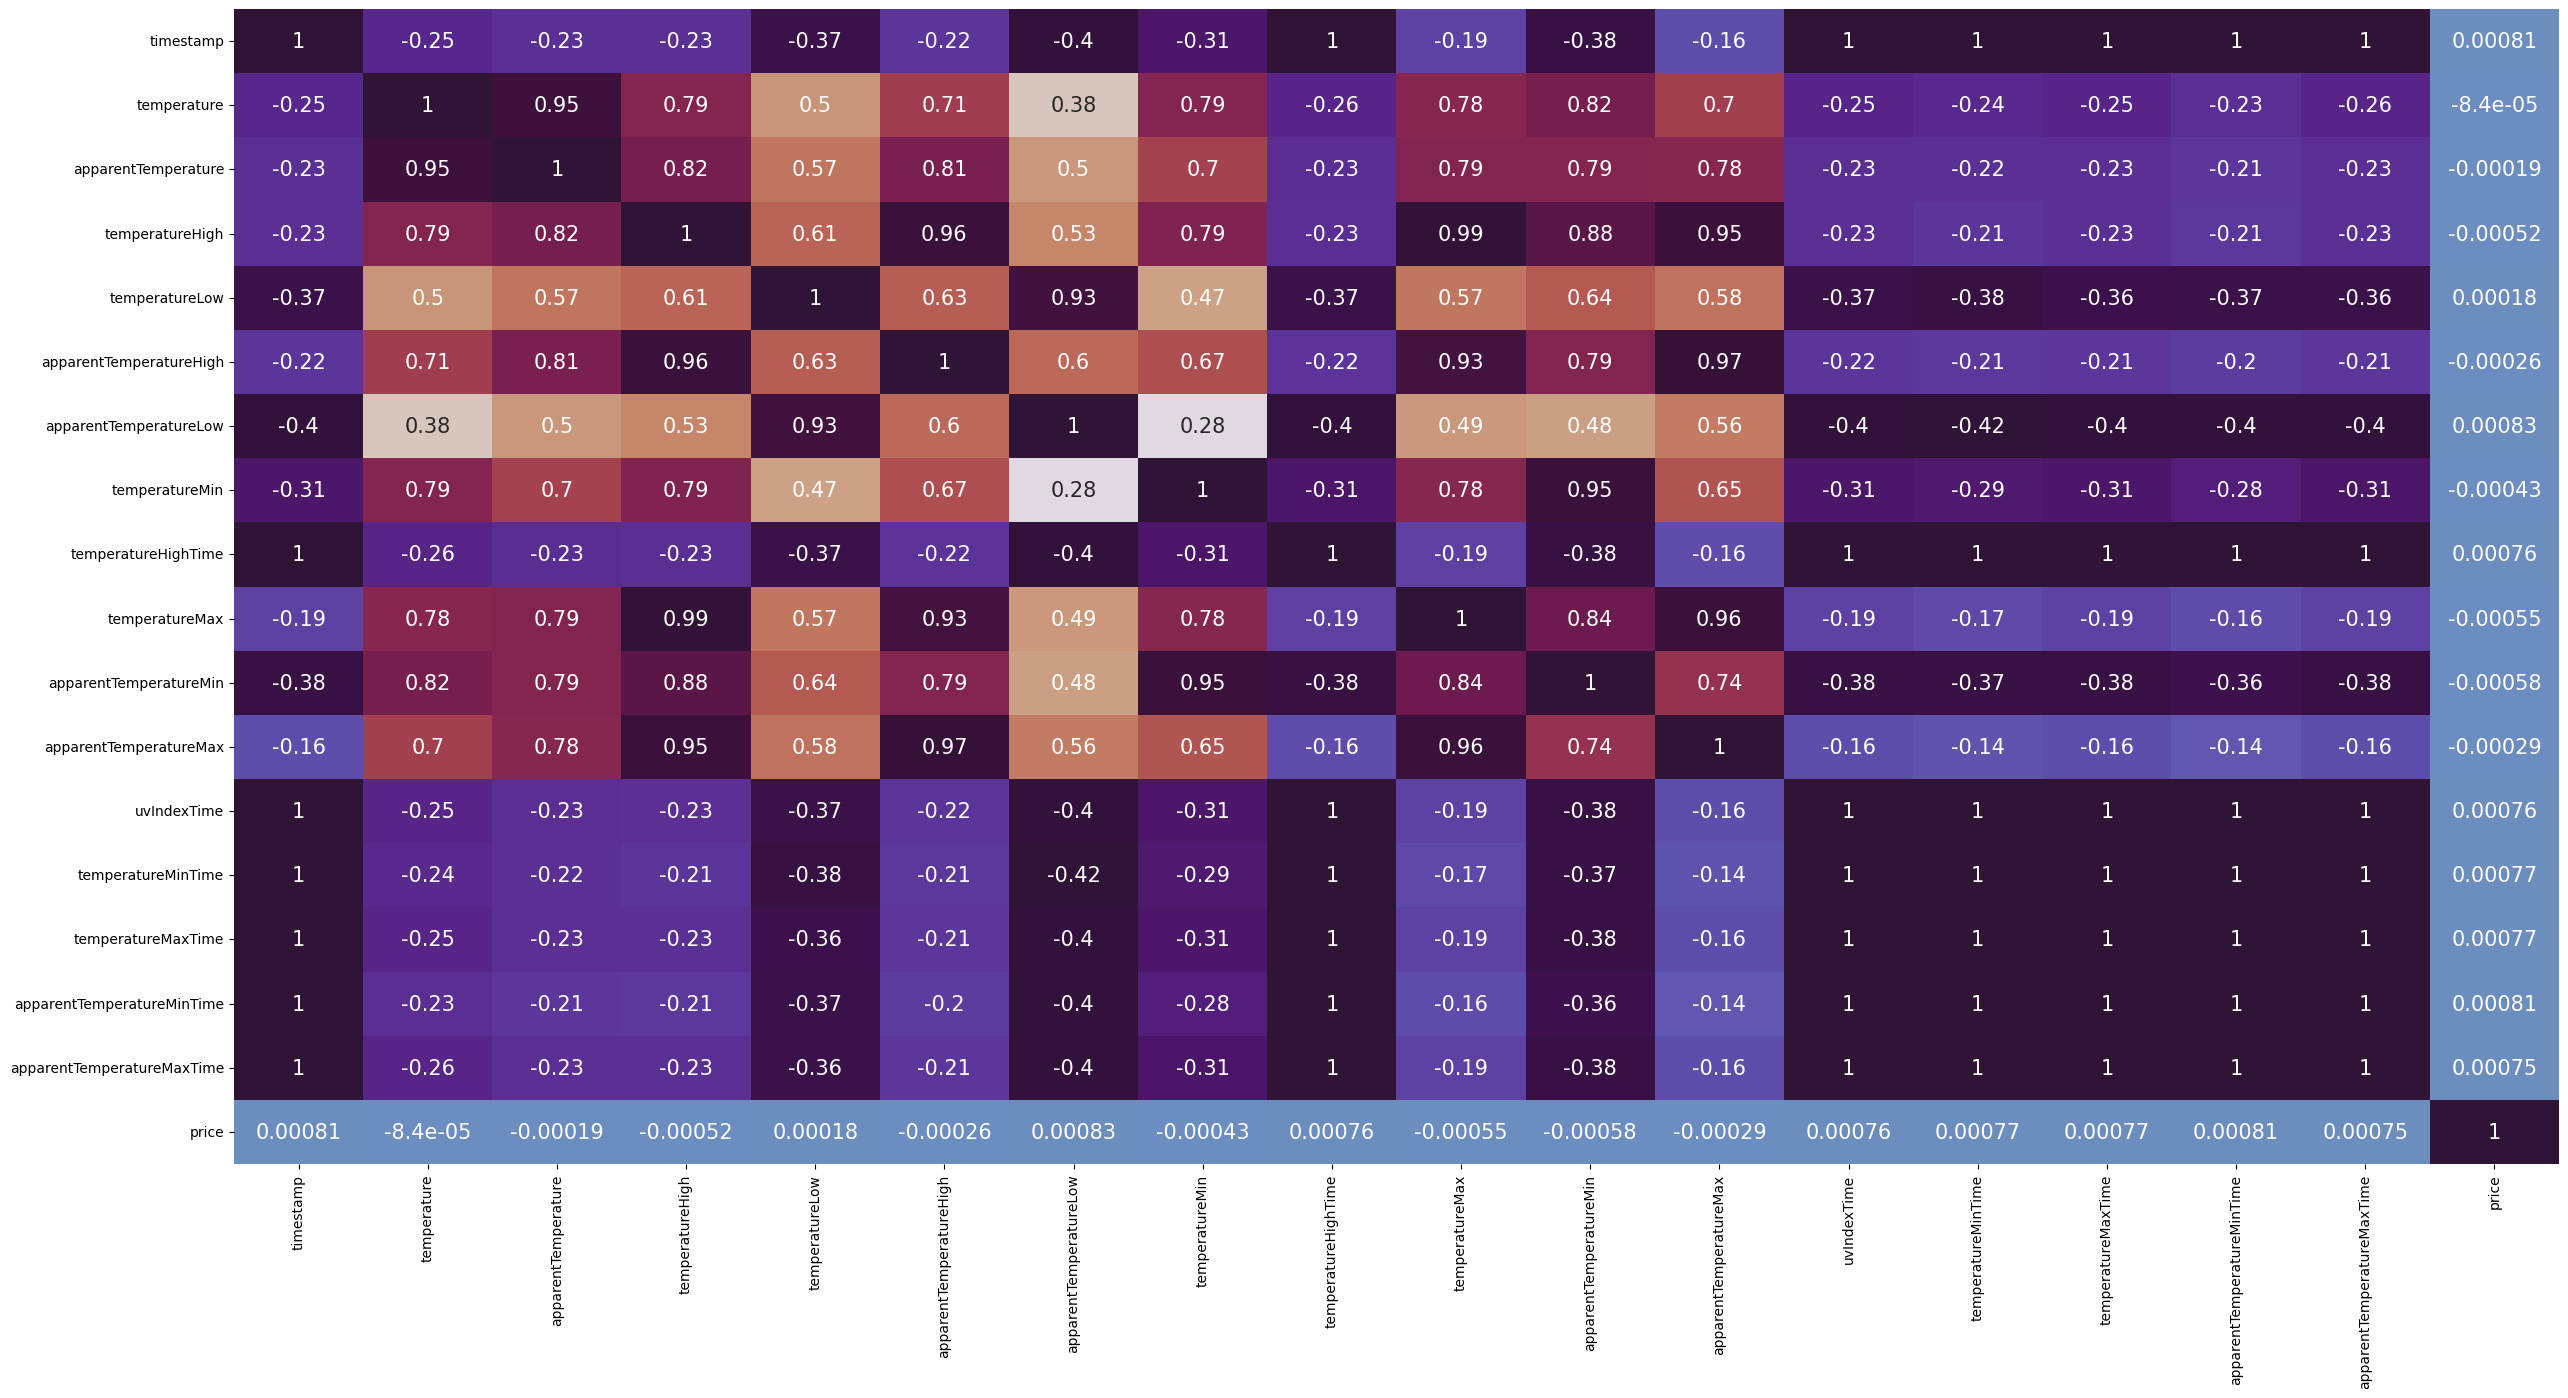

In [27]:
temp=['timestamp','datetime','long_summary','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
             'uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','price']
plt.figure(figsize=(30,15))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [28]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data    

,id,hour,day,month,timezone,cab_type,product_id,name,price,distance,...,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Lyft,lyft_line,Shared,5.0,0.44,...,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Lyft,lyft_premier,Lux,11.0,0.44,...,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Lyft,lyft,Lyft,7.0,0.44,...,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,23,1,12,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End


,hour,day,month,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,price
hour,1.000000,0.066223,-0.079734,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,0.000561
day,0.066223,1.000000,-0.861325,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.000722
month,-0.079734,-0.861325,1.000000,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.000913
pressure,-0.067787,-0.444738,0.589683,1.000000,-0.280552,-0.285422,0.004794,0.227875,-0.451172,0.533088,0.533049,-0.528006,-0.243853,0.000866
windBearing,0.036292,0.092226,-0.135317,-0.280552,1.000000,-0.221271,0.114145,0.401478,0.345798,-0.133338,-0.133349,0.263138,-0.554367,-0.001382
cloudCover,0.026680,-0.041103,-0.016767,-0.285422,-0.221271,1.000000,-0.067050,-0.477676,0.042647,-0.080408,-0.080385,0.093659,0.395542,0.000883
uvIndex,0.330326,-0.012083,-0.012340,0.004794,0.114145,-0.067050,1.000000,0.119983,-0.017363,-0.024079,-0.024081,0.055754,-0.040910,-0.000424
visibility.1,0.173776,0.105210,0.011129,0.227875,0.401478,-0.477676,0.119983,1.000000,0.262795,0.152464,0.152451,-0.173673,-0.544535,0.001497
ozone,0.034035,0.376791,-0.149111,-0.451172,0.345798,0.042647,-0.017363,0.262795,1.000000,0.194432,0.194471,-0.230002,-0.222898,0.000460
sunriseTime,-0.028016,-0.341201,0.770749,0.533088,-0.133338,-0.080408,-0.024079,0.152464,0.194432,1.000000,1.000000,-0.844716,-0.210841,0.000760


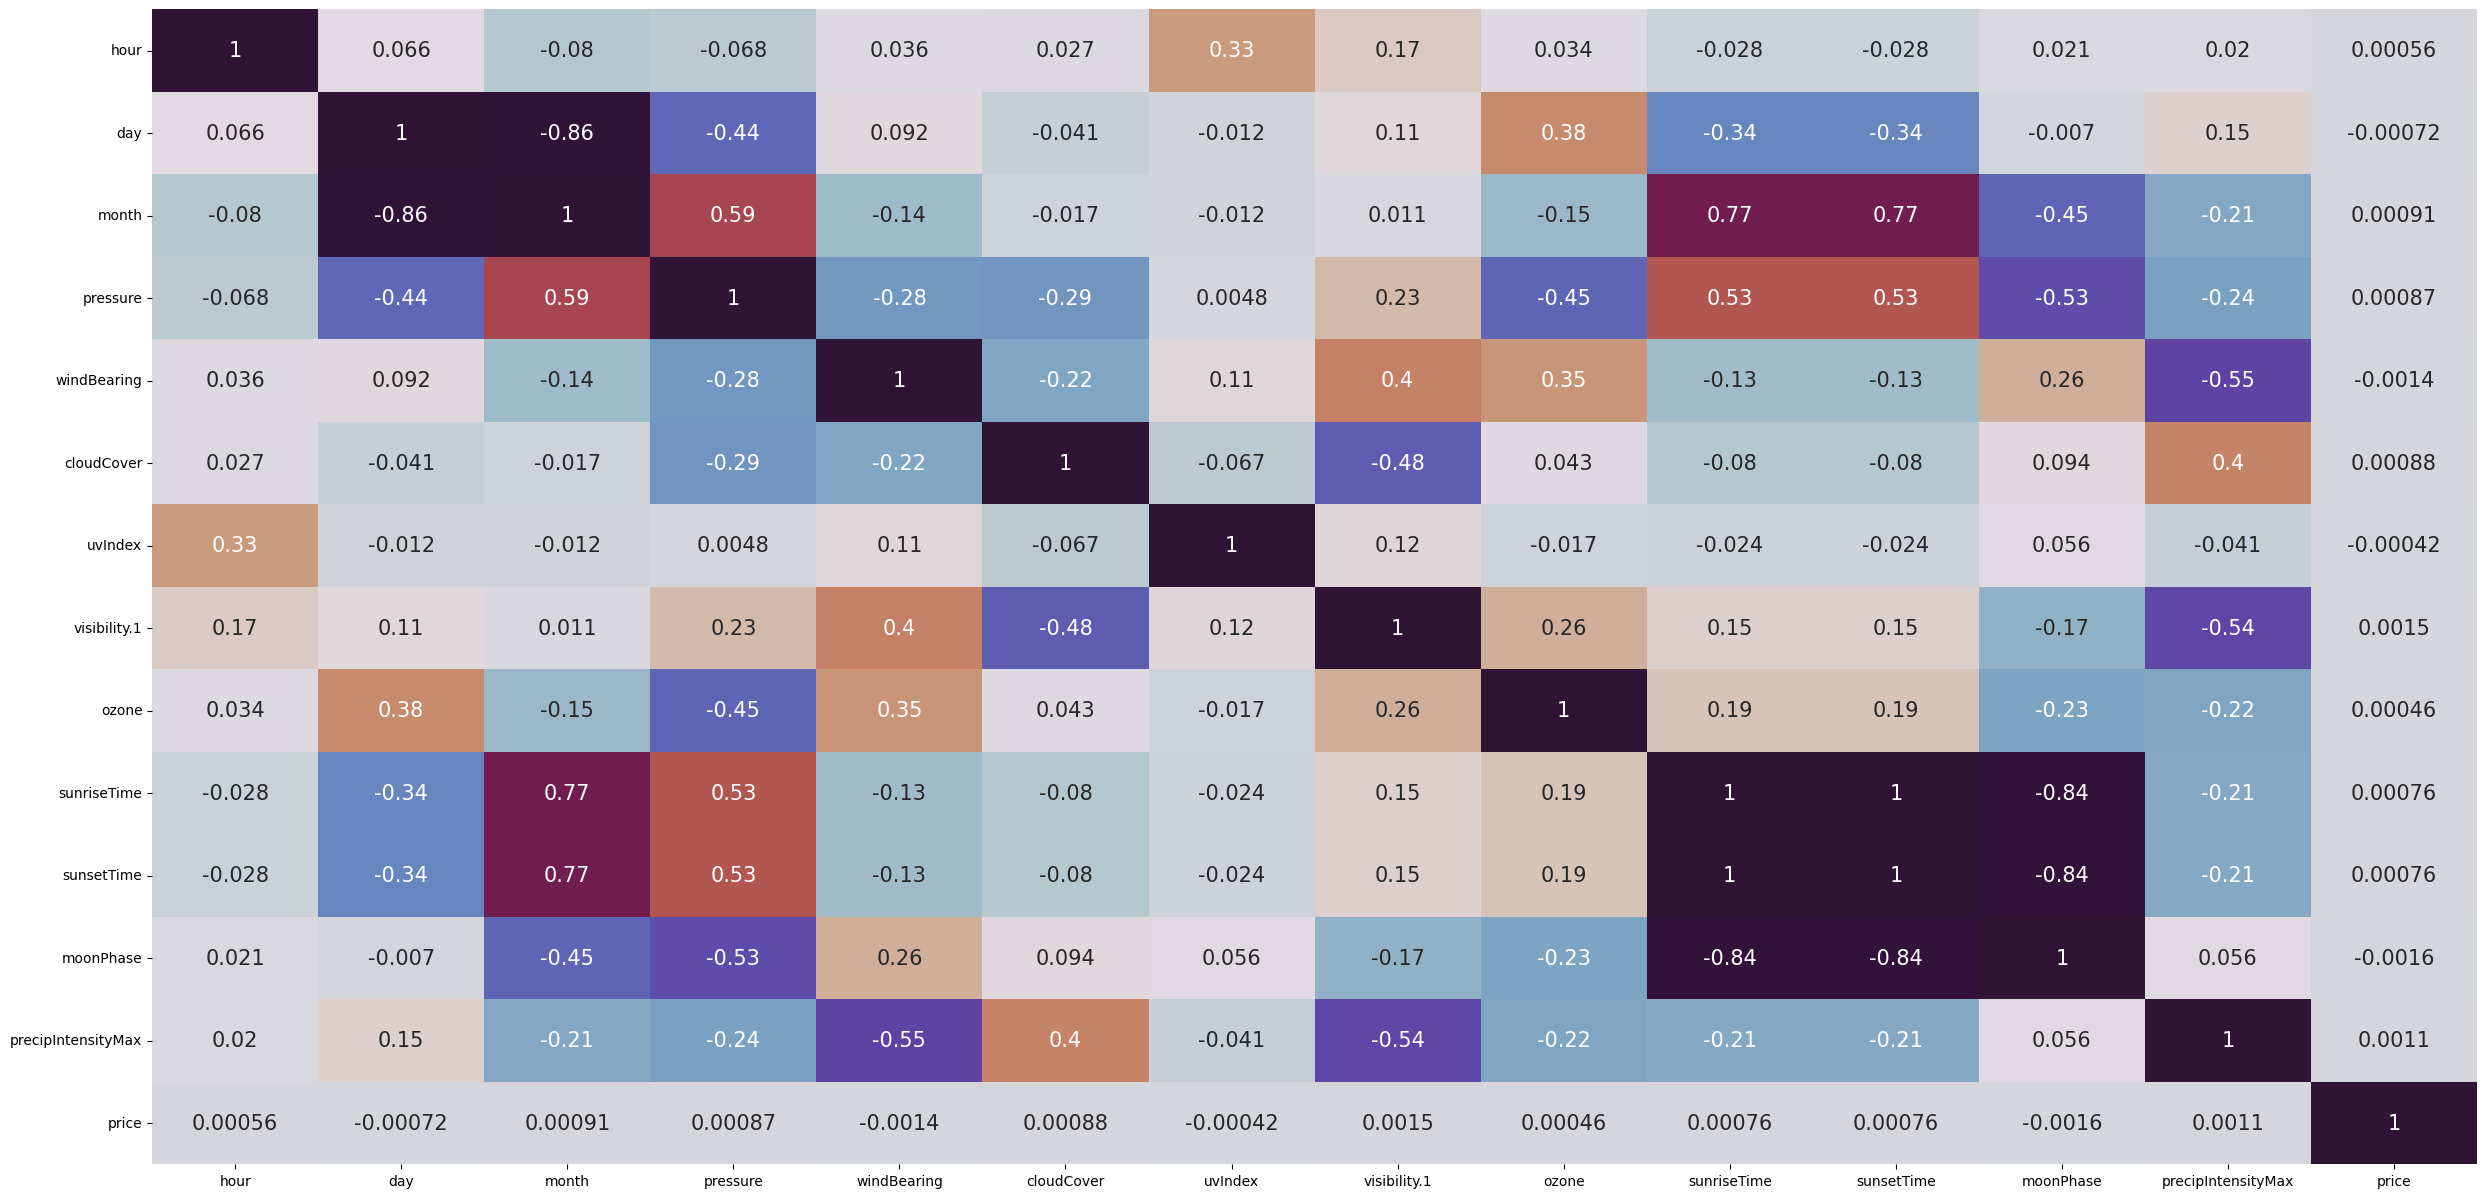

In [29]:
temp=['hour','day','month','pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax','price']
plt.figure(figsize=(30,15))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [30]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data 

,id,timezone,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,...,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,icon,dewPoint,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,...,8.66,9.17,1545015600,10.000,1545048000,1544968800,1545044400,partly-cloudy-night,32.70,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,...,11.98,11.98,1543291200,4.786,1543298400,1543251600,1543291200,rain,41.83,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,...,7.33,7.33,1543334400,10.000,1543402800,1543320000,1543392000,clear-night,31.10,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,...,5.28,5.28,1543514400,10.000,1543579200,1543510800,1543575600,clear-night,26.64,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,...,9.14,9.14,1543446000,10.000,1543478400,1543420800,1543460400,partly-cloudy-night,28.61,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,...,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,...,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,...,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,...,2.34,2.87,1543672800,9.785,1543712400,1543690800,1543712400,partly-cloudy-night,29.65,West End to North End


,humidity,windSpeed,windGust,windGustTime,visibility,temperatureLowTime,apparentTemperatureHighTime,apparentTemperatureLowTime,dewPoint,latitude,price
humidity,1.000000,-0.207121,-0.306424,-0.158725,-0.697860,-0.164480,-0.162342,-0.161368,0.747305,-0.117721,-0.001238
windSpeed,-0.207121,1.000000,0.937649,-0.071113,-0.035550,-0.060273,-0.072960,-0.065128,-0.074816,-0.097125,0.000990
windGust,-0.306424,0.937649,1.000000,0.000351,0.038898,0.012745,0.000825,0.007499,-0.175292,0.024346,0.001218
windGustTime,-0.158725,-0.071113,0.000351,1.000000,0.152082,0.998968,0.999163,0.999034,-0.260032,0.172786,0.000851
visibility,-0.697860,-0.035550,0.038898,0.152082,1.000000,0.152553,0.155092,0.151276,-0.579974,0.124286,0.001497
temperatureLowTime,-0.164480,-0.060273,0.012745,0.998968,0.152553,1.000000,0.999684,0.999961,-0.267772,0.171345,0.000754
apparentTemperatureHighTime,-0.162342,-0.072960,0.000825,0.999163,0.155092,0.999684,1.000000,0.999710,-0.269662,0.173454,0.000741
apparentTemperatureLowTime,-0.161368,-0.065128,0.007499,0.999034,0.151276,0.999961,0.999710,1.000000,-0.265532,0.172724,0.000761
dewPoint,0.747305,-0.074816,-0.175292,-0.260032,-0.579974,-0.267772,-0.269662,-0.265532,1.000000,-0.130576,-0.000615
latitude,-0.117721,-0.097125,0.024346,0.172786,0.124286,0.171345,0.173454,0.172724,-0.130576,1.000000,0.002088


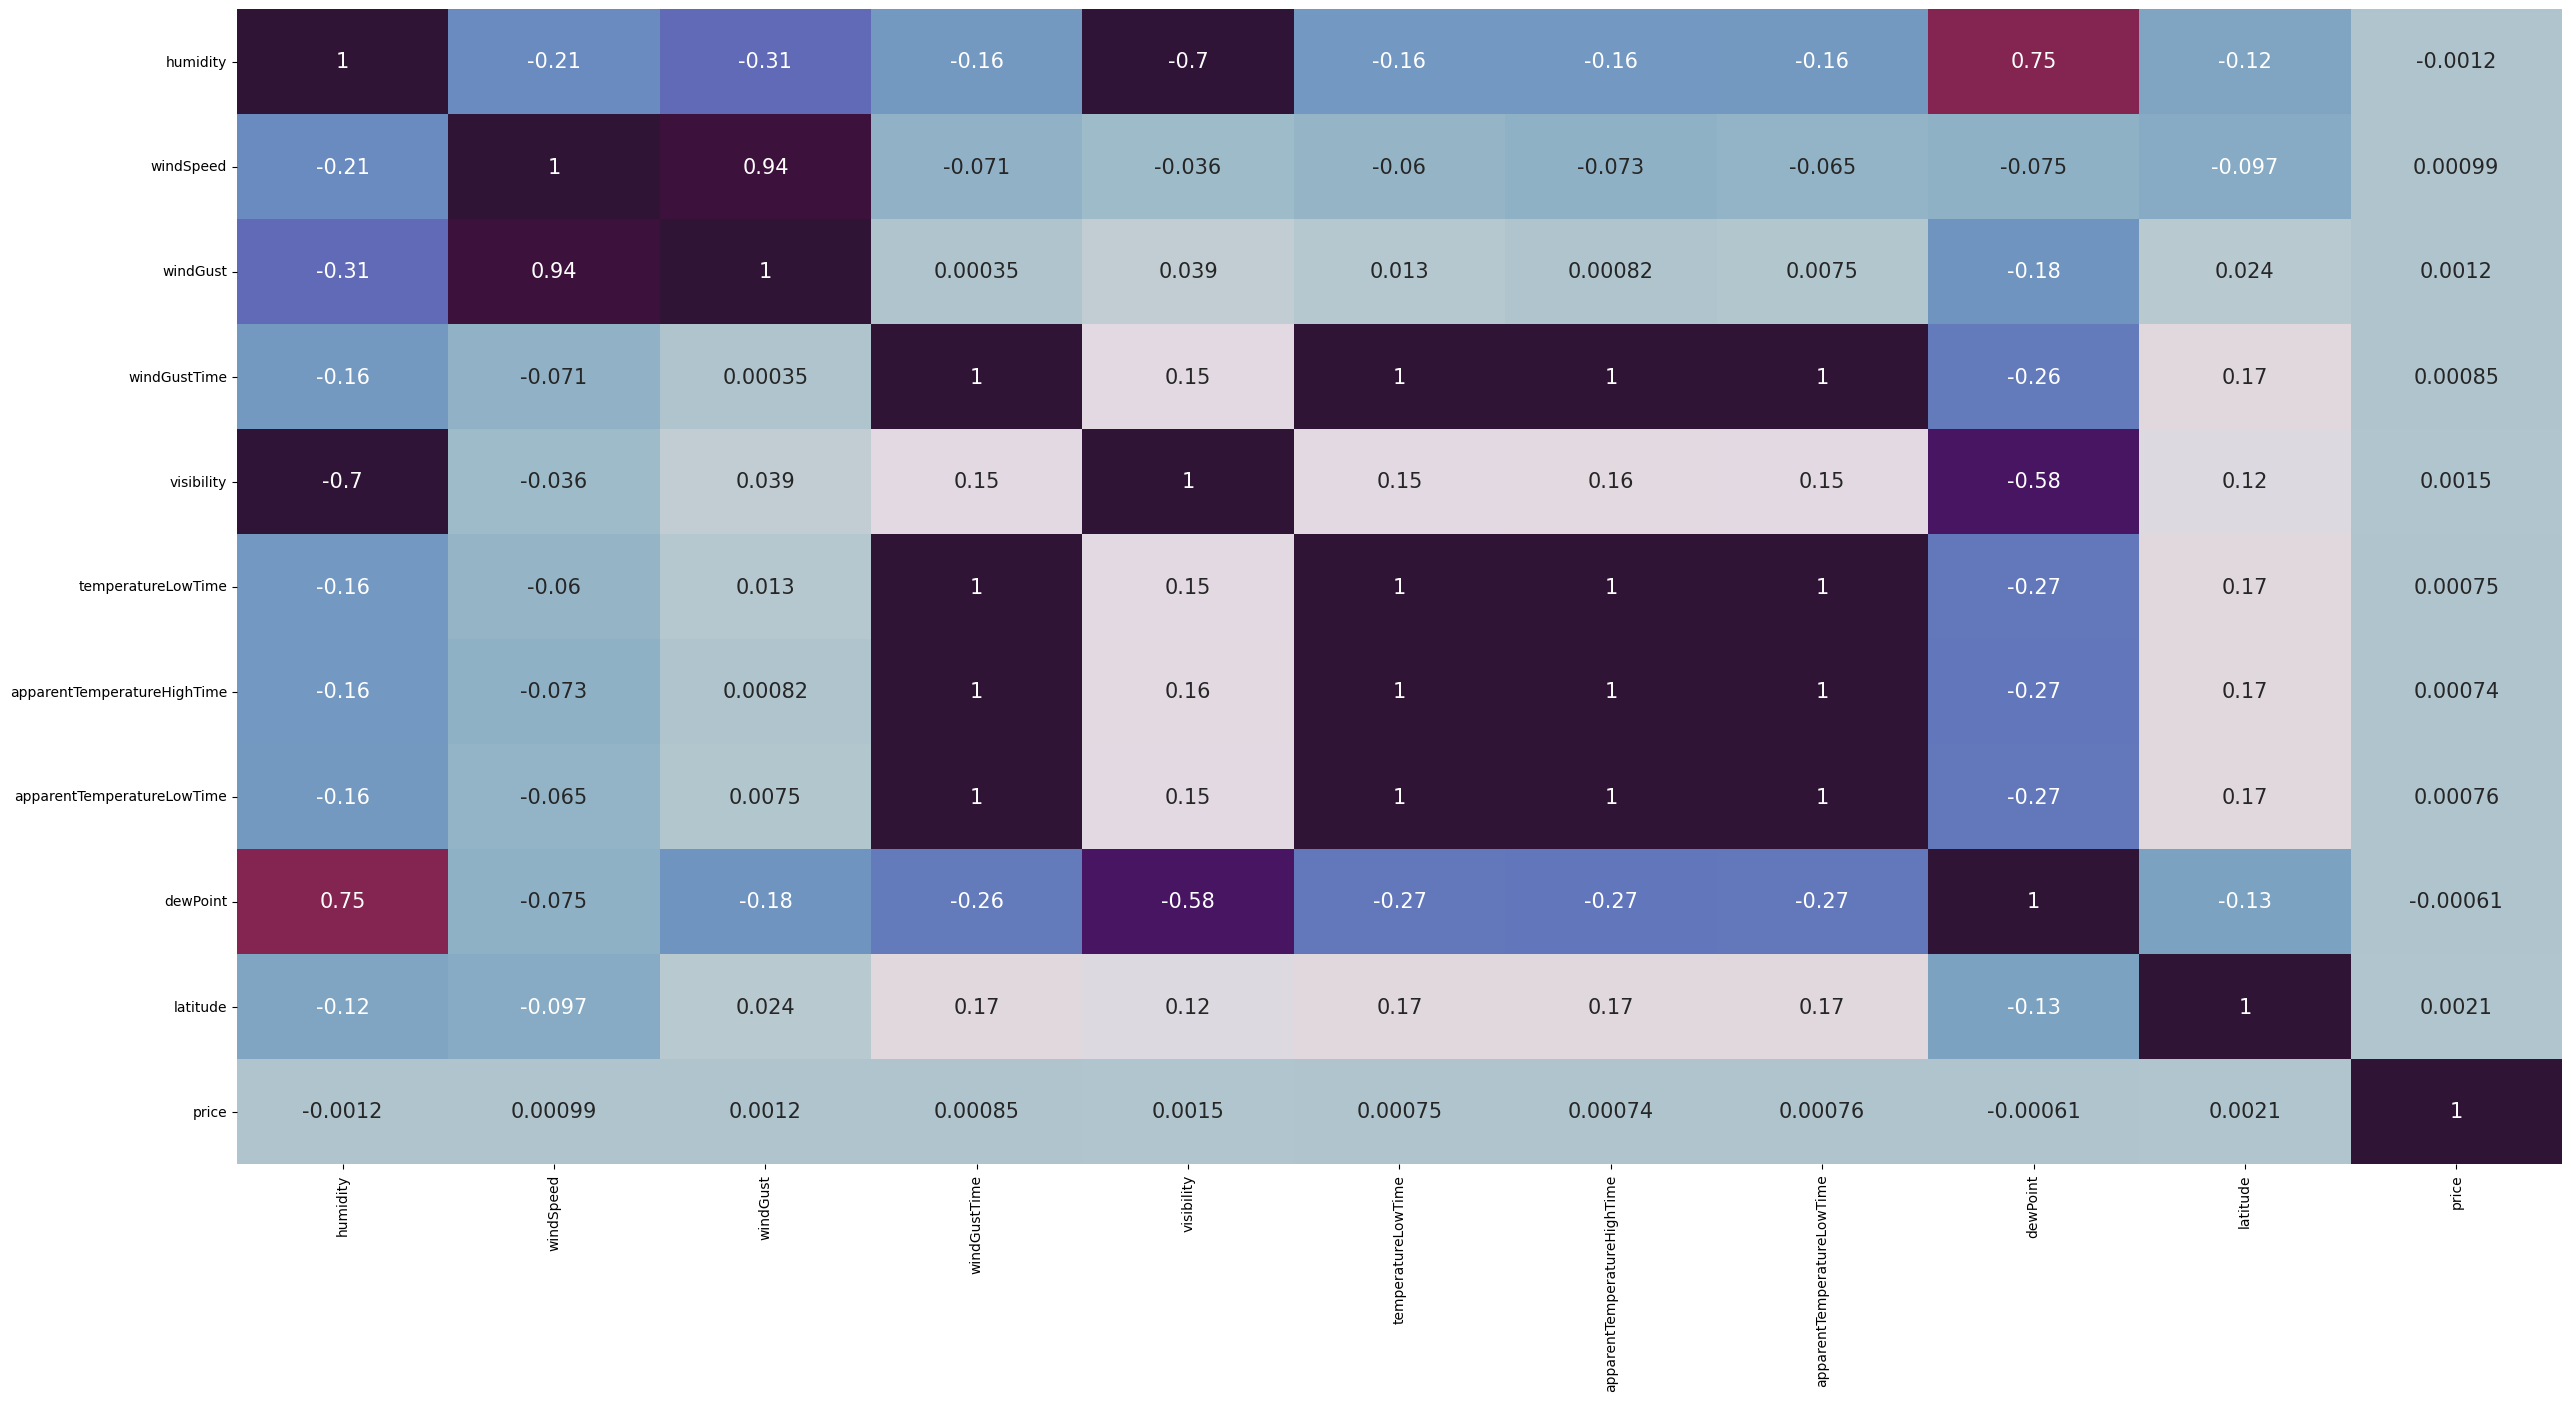

In [31]:
temp=['humidity','windSpeed','windGust','windGustTime','visibility','temperatureLowTime','apparentTemperatureHighTime',
      'apparentTemperatureLowTime','dewPoint','latitude','price']
plt.figure(figsize=(30,15))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

In [32]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data 

,id,timezone,cab_type,product_id,name,price,distance,surge_multiplier,longitude,short_summary,precipIntensity,precipProbability,icon,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Lyft,lyft_line,Shared,5.0,0.44,1.0,-71.0330,Mostly Cloudy,0.0000,0.0,partly-cloudy-night,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Lyft,lyft_premier,Lux,11.0,0.44,1.0,-71.0330,Rain,0.1299,1.0,rain,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Lyft,lyft,Lyft,7.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,-71.0330,Clear,0.0000,0.0,clear-night,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,-71.0330,Partly Cloudy,0.0000,0.0,partly-cloudy-night,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,-71.0643,Partly Cloudy,0.0000,0.0,partly-cloudy-night,West End to North End


,precipIntensity,precipProbability,longitude,price
precipIntensity,1.000000,0.838417,0.130794,0.000166
precipProbability,0.838417,1.000000,0.122212,-0.000243
longitude,0.130794,0.122212,1.000000,-0.001417
price,0.000166,-0.000243,-0.001417,1.000000


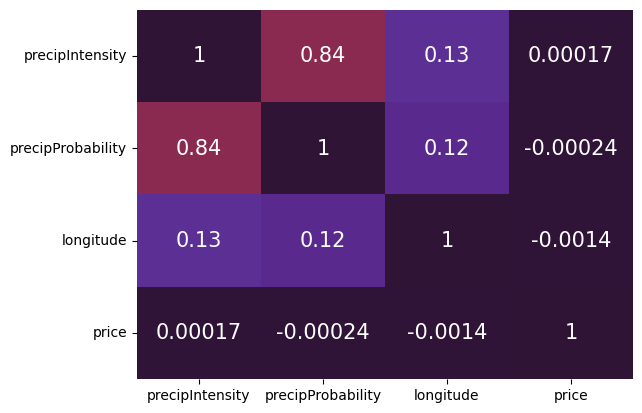

In [33]:
temp=['precipIntensity','precipProbability','longitude','price']
sns.heatmap(data[temp].corr(),annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
data[temp].corr()

In [34]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data 

,id,timezone,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,icon,route
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,America/New_York,Lyft,lyft_line,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,America/New_York,Lyft,lyft_premier,Lux,11.0,0.44,1.0,Rain,rain,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,America/New_York,Lyft,lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,America/New_York,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,Partly Cloudy,partly-cloudy-night,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,Partly Cloudy,partly-cloudy-night,West End to North End


In [35]:
feature=['distance','surge_multiplier','name','cab_type','route']

Berdasarkan corr map yang telah divisualisasikan diatas, diperoleh bahwa atribut yang memiliki korelasi yang cukup besar terhadap prediktor ialah atribut distance, surge_multiplier, yaitu sebesar 0.24 dan 0.35. Hal ini cukup baik dibandingkan dengan atribut lain yang hanya memiliki korelasi yang kecil dengan prediktor. Sehingga distance dan surge_multiplier dipilih sebagai feature yang akan digunakan nantinya. Sedangkan untuk atribut lainnya terdapat atribut categorical berupa cab_type, name, dan route (yang merupakan gabungan dari kolom source dan destination). Pemilihan atribut categorical ini dikarenakan cab_type, name perlu ditampilkan mengingat 2 atribut ini merupakan merk serta produk yang disediakan oleh masing-masing transportasi. Sedangkan route dipilih karena memiliki hubungan dengan distance yang akan berkorelasi cukup baik dengan price.  

## **Pendefinisian Model**

In [36]:
# dilakukan pemisahan antara features dan label, feature diassign ke var X dan label ke var y
X = data[feature]
y = data['price']

In [37]:
key = X.keys()
print(key)

Index(['distance', 'surge_multiplier', 'name', 'cab_type', 'route'], dtype='object')


In [38]:
X

,distance,surge_multiplier,name,cab_type,route
0,0.44,1.0,Shared,Lyft,Haymarket Square to North Station
1,0.44,1.0,Lux,Lyft,Haymarket Square to North Station
2,0.44,1.0,Lyft,Lyft,Haymarket Square to North Station
3,0.44,1.0,Lux Black XL,Lyft,Haymarket Square to North Station
4,0.44,1.0,Lyft XL,Lyft,Haymarket Square to North Station
...,...,...,...,...,...
693065,1.00,1.0,WAV,Uber,West End to North End
693066,1.00,1.0,UberXL,Uber,West End to North End
693067,1.00,1.0,UberX,Uber,West End to North End
693069,1.00,1.0,Black SUV,Uber,West End to North End


In [39]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64

In [40]:
# dilakukan proses label encoder untuk fitur cab_type dan name
le_col = ['cab_type','route']
label = LabelEncoder()

for col in le_col:
    X[col] = label.fit_transform(X[col])
X

C:\Users\tsaab\AppData\Local\Temp\ipykernel_10828\1108888207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label.fit_transform(X[col])


,distance,surge_multiplier,name,cab_type,route
0,0.44,1.0,Shared,0,33
1,0.44,1.0,Lux,0,33
2,0.44,1.0,Lyft,0,33
3,0.44,1.0,Lux Black XL,0,33
4,0.44,1.0,Lyft XL,0,33
...,...,...,...,...,...
693065,1.00,1.0,WAV,1,69
693066,1.00,1.0,UberXL,1,69
693067,1.00,1.0,UberX,1,69
693069,1.00,1.0,Black SUV,1,69


In [41]:
encoded = pd.get_dummies(X['name'])
encoded

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1
693066,0,0,0,0,0,0,0,0,0,0,1,0
693067,0,0,0,0,0,0,0,0,0,1,0,0
693069,0,1,0,0,0,0,0,0,0,0,0,0


Dikarenakan terdapat 3 atribut categorical, dilakukan proses label encoder dan One Hot Encoder. Label encoder dilakukan untuk atribut cab_type dan route dikarenakan nilai unique yang tidak terlalu banyak. Sedangkan One Hot Encoder dilakukan untuk atribut name karena nilai unique yang dimiliki cukup banyak. Proses encoding ini dilakukan agar data yang bersifat categorical dapat diubah menjadi bentuk numerical agar mudah diolah pada saat dilakukan pemodelan.

In [42]:
X = X.join(encoded)
X

,distance,surge_multiplier,name,cab_type,route,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,Shared,0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,Lux,0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,Lyft,0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,Lux Black XL,0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,Lyft XL,0,33,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,WAV,1,69,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,UberXL,1,69,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,UberX,1,69,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,Black SUV,1,69,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
X.drop(['name'],axis=1,inplace=True)
X

,distance,surge_multiplier,cab_type,route,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,0,33,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,1,69,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,1,69,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,1,69,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,1,69,0,1,0,0,0,0,0,0,0,0,0,0


### **Linear Regression**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (446583, 16)
X_test shape is  (191393, 16)
y_train shape is  (446583,)
y_test shape is  (191393,)


In [45]:
# proses prediksi label dengan LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [46]:
print('coefficient of determination: ', model.score(X_train,y_train))
print('intercept: ', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination:  0.9273649159542209
intercept:  92086091056.74611
slope:  [ 2.80547606e+00  1.83817804e+01  1.48807351e+10  5.19700046e-03
 -1.06966826e+11 -1.06966826e+11 -9.20860911e+10 -9.20860911e+10
 -9.20860910e+10 -9.20860911e+10 -9.20860911e+10 -9.20860911e+10
 -1.06966826e+11 -1.06966826e+11 -1.06966826e+11 -1.06966826e+11]


In [47]:
y_pred = model.intercept_ + np.sum(model.coef_ * X_test, axis=1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
412085     3.656662
200606    45.012939
378179    11.515976
507174    19.835388
523327    24.712921
            ...    
122454    10.431915
2678      27.204544
655051    26.311905
337407     9.981506
74898     12.894241
Length: 191393, dtype: float64


In [48]:
pred=pd.DataFrame(y_test[:30])
pred['predict']=y_pred[:30]
pred

,price,predict
412085,7.0,3.656662
200606,45.0,45.012939
378179,13.5,11.515976
507174,19.5,19.835388
523327,22.5,24.712921
165765,7.0,8.271423
16815,10.5,11.219360
288754,8.5,7.600021
215169,16.5,15.501572
197492,26.0,31.571701


In [49]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  1.7781052486965017
Mean Squared Error Value is :  6.29729632813187
Median Absolute Error Value is :  1.3785247802734375


In [50]:
model.score(X_train, y_train)

0.9273649159542209

In [51]:
model.score(X_test, y_test)

0.9275017452285402

In [52]:
dif = model.score(X_test, y_test) - model.score(X_train, y_train)
dif

0.00013682927431935

Untuk pemodelan dengan Linear Regression, diperoleh akurasi untuk data testing sebesar 0.9275015597994911 dan untuk data training sebesar 0.9273651547807802. Untuk melihat apakah model yang dibangun overfitting atau tidak, hal ini bisa dilihat dari selisih dari score data training dan data testing yaitu sebesar 0.0001364050187109278. Hal ini menandakan model yang dibangun tidak overfitting dan akurasi yang diperoleh juga sudah cukup baik.

### **Random Forest Regressor**

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (446583, 16)
X_test shape is  (191393, 16)
y_train shape is  (446583,)
y_test shape is  (191393,)


In [54]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=33)
RandomForestRegressorModel.fit(X_train,y_train)
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9701642432899019
Random Forest Regressor Test Score is :  0.9676884775312622


In [55]:
y_pred = RandomForestRegressorModel.predict(X_test)
y_pred

array([ 6.29833001, 49.1206734 , 11.12341332, ..., 26.86262627,
        9.78867066, 13.08574675])

In [56]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  1.076676779034795
Mean Squared Error Value is :  2.80662247144248
Median Absolute Error Value is :  0.769556210550542


In [57]:
pred=pd.DataFrame(y_test[:30])
pred['predict']=y_pred[:30]
pred

,price,predict
412085,7.0,6.298330
200606,45.0,49.120673
378179,13.5,11.123413
507174,19.5,20.724897
523327,22.5,24.645443
165765,7.0,7.034433
16815,10.5,10.697540
288754,8.5,9.067349
215169,16.5,15.499763
197492,26.0,27.821872


In [58]:
RandomForestRegressorModel.score(X_test, y_test)

0.9676884775312622

In [59]:
RandomForestRegressorModel.score(X_train, y_train)

0.9701642432899019

In [60]:
dif = RandomForestRegressorModel.score(X_test, y_test) - RandomForestRegressorModel.score(X_train, y_train)
dif

-0.0024757657586397253

Untuk pemodelan dengan RandomForestRegressor, diperoleh akurasi untuk data testing sebesar 0.9676884775312622 dan untuk data training sebesar 0.9676884775312622. Untuk melihat apakah model yang dibangun overfitting atau tidak, hal ini bisa dilihat dari selisih dari score data training dan data testing yaitu sebesar -0.0024757657586397253. Nilai yang minus ini, menandakan adanya potensi model untuk overfitting, hal ini dikarenakan score untuk data training lebih besar dibandingkan score data testing yang berakibat nilai dif yang minus.

### **XGBoost**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (446583, 16)
X_test shape is  (191393, 16)
y_train shape is  (446583,)
y_test shape is  (191393,)


In [62]:
xgb = XGBRegressor().fit(X_train, y_train)

In [63]:
y_pred = xgb.predict(X_test)
y_pred

array([ 6.117455, 49.07151 , 12.531204, ..., 26.868187,  9.534384,
       12.77348 ], dtype=float32)

In [64]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  1.06832620705505
Mean Squared Error Value is :  2.710835679830454
Median Absolute Error Value is :  0.7599468231201172


In [65]:
pred=pd.DataFrame(y_test[:30])
pred['predict']=y_pred[:30]
pred

,price,predict
412085,7.0,6.117455
200606,45.0,49.071510
378179,13.5,12.531204
507174,19.5,20.121752
523327,22.5,24.886219
165765,7.0,6.867188
16815,10.5,10.710024
288754,8.5,9.128560
215169,16.5,15.683087
197492,26.0,28.653915


In [66]:
xgb.score(X_test, y_test)

0.968791232568989

In [67]:
xgb.score(X_train, y_train)

0.9697838396655568

In [68]:
dif = xgb.score(X_test, y_test) - xgb.score(X_train, y_train)
dif

-0.000992607096567788

Untuk pemodelan dengan XGBoost, diperoleh akurasi untuk data testing sebesar 0.968791232568989 dan untuk data training sebesar 0.9697838396655568. Untuk melihat apakah model yang dibangun overfitting atau tidak, hal ini bisa dilihat dari selisih dari score data training dan data testing yaitu sebesar -0.000992607096567788. Nilai yang minus ini menandakan adanya potensi model untuk overfitting, hal ini dikarenakan score untuk data training lebih besar dibandingkan score data testing yang berakibat nilai dif yang minus.

## **Kesimpulan**

Berdasarkan proses diatas dapat disimpulkan bahwa jenis model yang terbaik adalah Linear Regression. Dari segi akurasi model LinearRegression() memang tidak terlalu tinggi dibandingkan model yang lain seperti RandomForestRegressor dan XGBoost. Namun dari segi fitting model, LinearRegression() dinilai lebih unggul dibandingkan RandomForestRegressor dan XGBoost. LinearRegression() memiliki model yang tidak overfitting alias fit, sehingga model ini akan cukup friendly jika ingin digunakan kembali pada dataset yang lain. 